In [129]:
import pandas as pd
import seaborn as sns

%pylab inline
plt.style.use('ggplot')

matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

Populating the interactive namespace from numpy and matplotlib


## Does training imputation rate affect inference imputation rate?

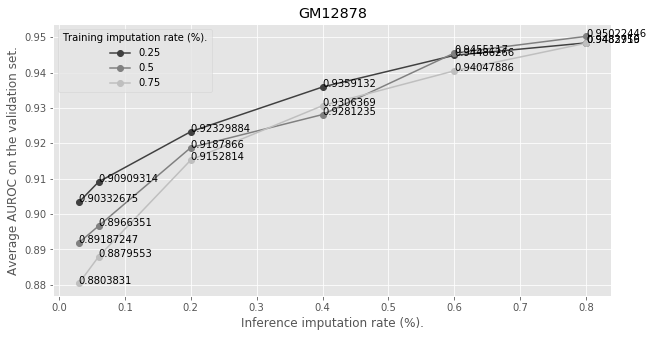

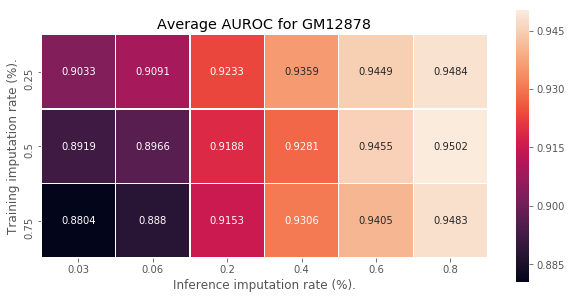

In [130]:
# All trained with a 6-layer transformer using a batch size of 32.
inference_imputation_rates =  [0.03        , 0.06        , 0.2         , 0.4        , 0.6         , 0.8         ]
training_imputation_rate_25 = [0.90332675  , 0.90909314  , 0.92329884  , 0.9359132  , 0.94486266  , 0.9483756   ]
training_imputation_rate_50 = [0.89187247  , 0.8966351   , 0.9187866   , 0.9281235  , 0.9455117   , 0.95022446  ]
training_imputation_rate_75 = [0.8803831   , 0.8879553   , 0.9152814   , 0.9306369  , 0.94047886  , 0.9482919   ]

df = pd.DataFrame({x[0]: x[1:] for x in zip(
    inference_imputation_rates,
    training_imputation_rate_25,
    training_imputation_rate_50,
    training_imputation_rate_75)})

df.index = [ 0.25  , 0.5  , 0.75  ]

plt.plot(df.loc[0.25], "0.25", marker="o")
plt.plot(df.loc[0.50], "0.50", marker="o")
plt.plot(df.loc[0.75], "0.75", marker="o")
for _, row in df.iterrows():
    for inference_imputation_rate, average_auroc in row.items():
        plt.annotate(s=average_auroc, xy=(
            inference_imputation_rate, average_auroc))
plt.title("GM12878")
plt.xlabel("Inference imputation rate (%).")
plt.ylabel("Average AUROC on the validation set.")
plt.legend(title="Training imputation rate (%).")
plt.show()


sns.heatmap(df, annot=True, fmt=".4", linewidths=0.01, square=True)
plt.title("Average AUROC for GM12878")
plt.xlabel("Inference imputation rate (%).")
plt.ylabel("Training imputation rate (%).")
plt.show()

## Training models with a mini-batch size of 64

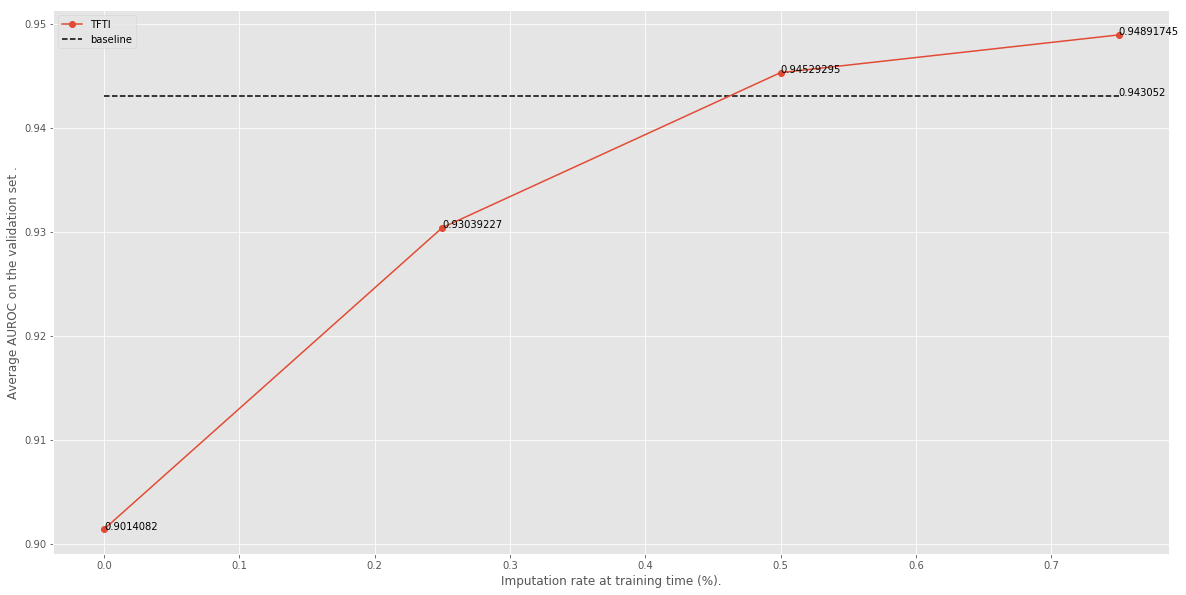

In [126]:
# All trained with a 6-layer transformer using a batch size of 64.
# Trained for 20,000 gradient steps.

training_imputation_rates = [0.         , 0.25        , 0.5         , 0.75        ]
average_aurocs            = [0.9014082  , 0.93039227  , 0.94529295  , 0.94891745  ]

plt.hlines(0.943052,  # Baseline DeepSEA plot
           min(training_imputation_rates),
           max(training_imputation_rates),
           linestyle='--',
           label='baseline')

plt.annotate(s=0.943052, xy=(max(training_imputation_rates), 0.943052))

plt.plot(training_imputation_rates, average_aurocs, label="TFTI", marker="o")
for x, y in zip(training_imputation_rates, average_aurocs):
    plt.annotate(s=y, xy=(x, y))

plt.title("")
plt.xlabel("Imputation rate at training time (%).")
plt.ylabel("Average AUROC on the validation set .")

plt.legend()
plt.show()